### 映画データセットのEDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('tmdb_5000_movies.csv')
df = df[(df!=0).all(axis=1)]
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


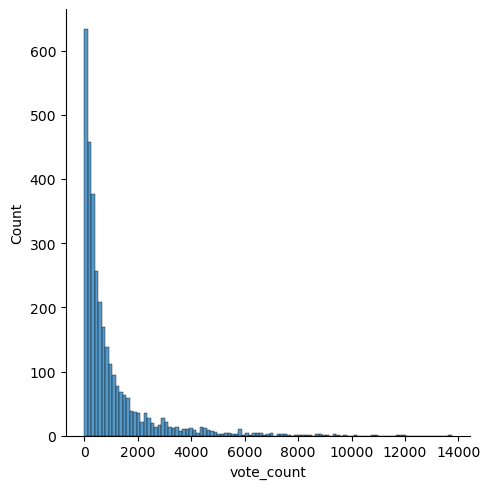

In [2]:
sns.displot(df['vote_count'])

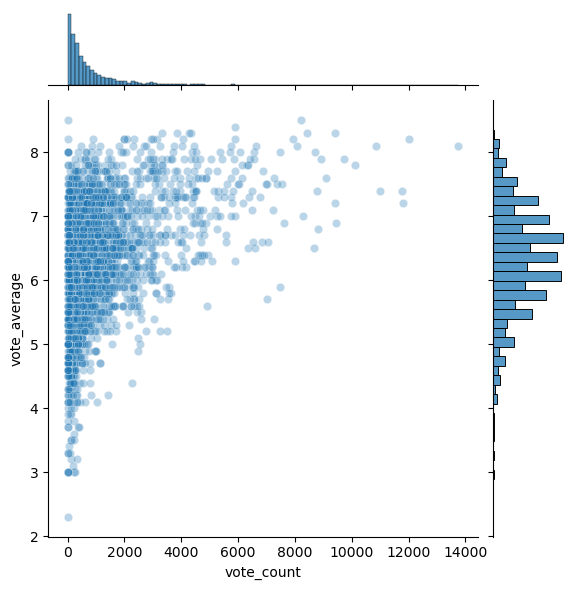

In [3]:
# 散布図＋ヒストグラム
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.3)

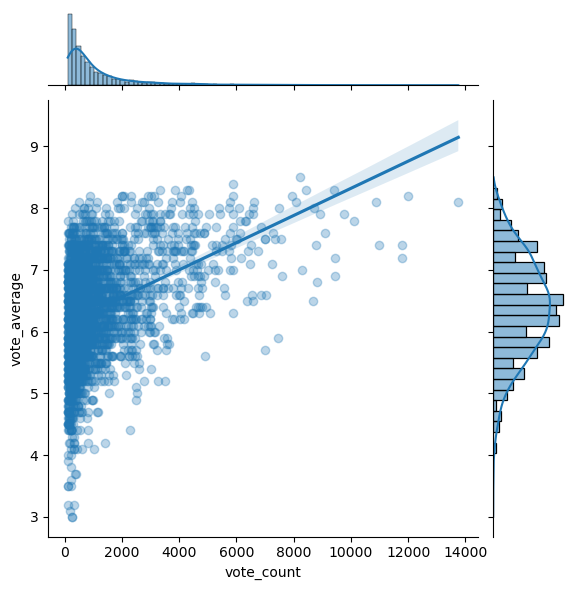

In [4]:
# vote_countが100未満のデータは信頼性が低いと考えて除外
df = df[(df['vote_count'] > 100)]
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg', joint_kws = {'scatter_kws': dict(alpha=0.3)})

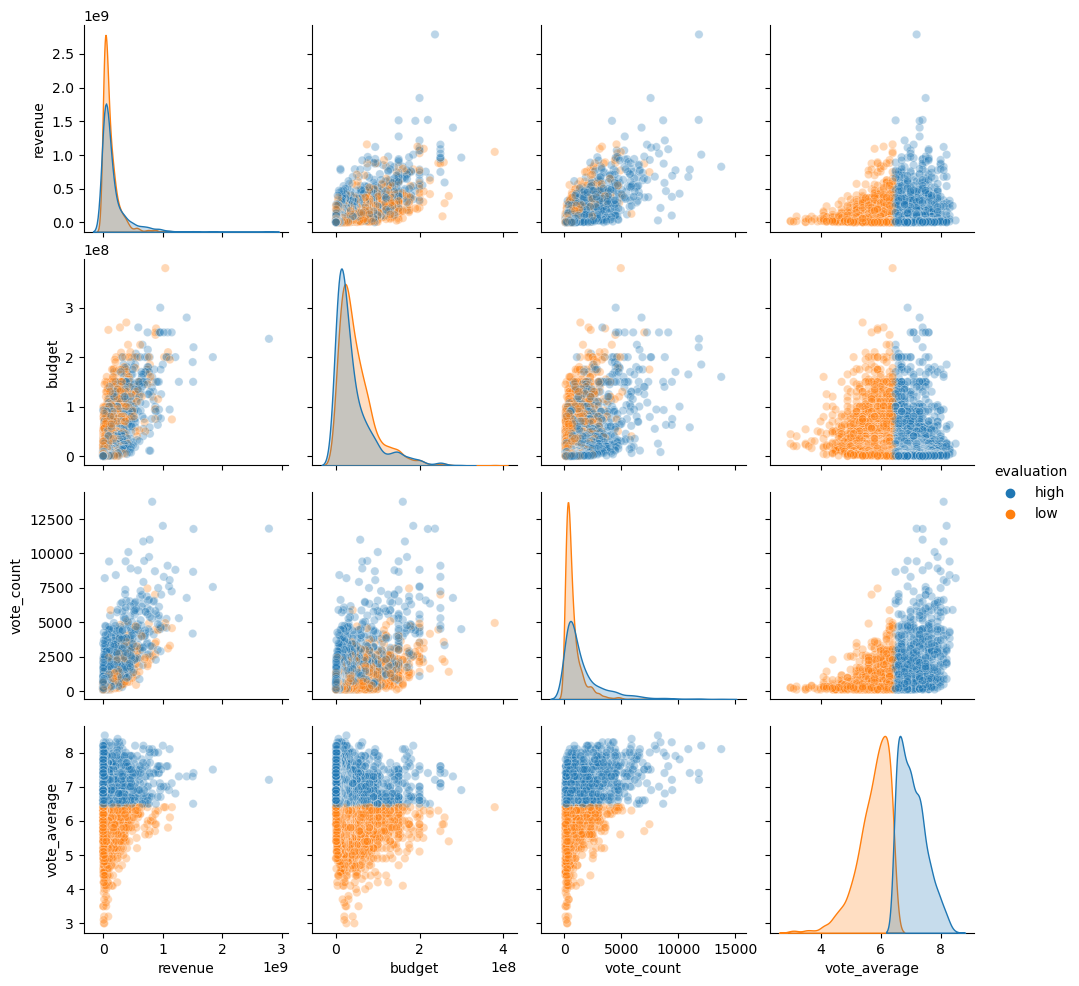

In [5]:
# vote_averageからevaluationカラムを作成
# 高評価と低評価の分布を見る
vote_average_median = df['vote_average'].median()
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']], hue='evaluation', plot_kws={'alpha':0.3})

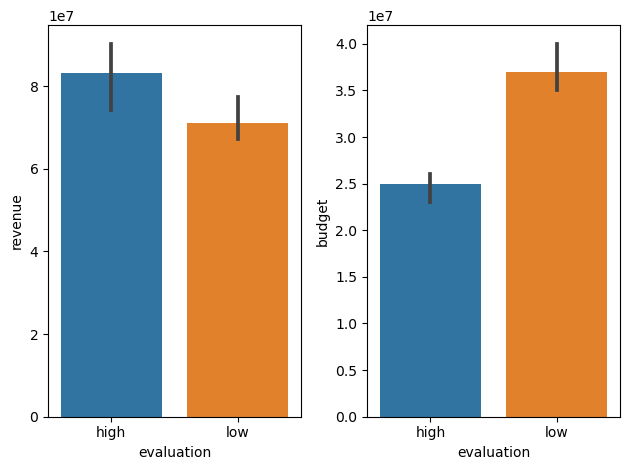

In [18]:
# 中央値で比較
fig, axes = plt.subplots(nrows=1, ncos=2)
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median, ax=axes[0])
sns.barplot(x='evaluation', y='budget', data=df, estimator=np.median, ax=axes[1])
plt.tight_layout()

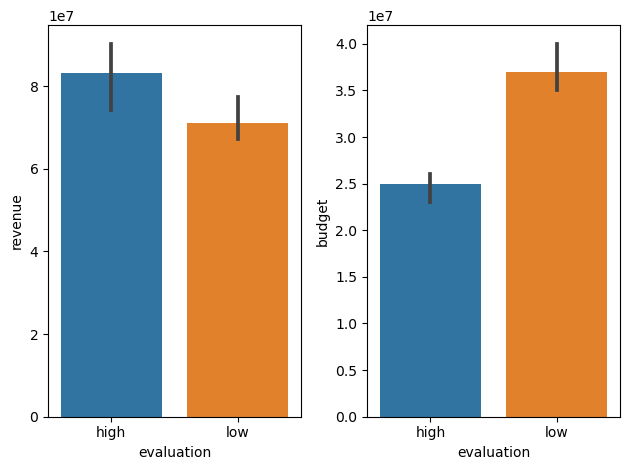

In [18]:
# 中央値で比較
fig, axes = plt.subplots(nrows=1, ncos=2)
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median, ax=axes[0])
sns.barplot(x='evaluation', y='budget', data=df, estimator=np.median, ax=axes[1])
plt.tight_layout()

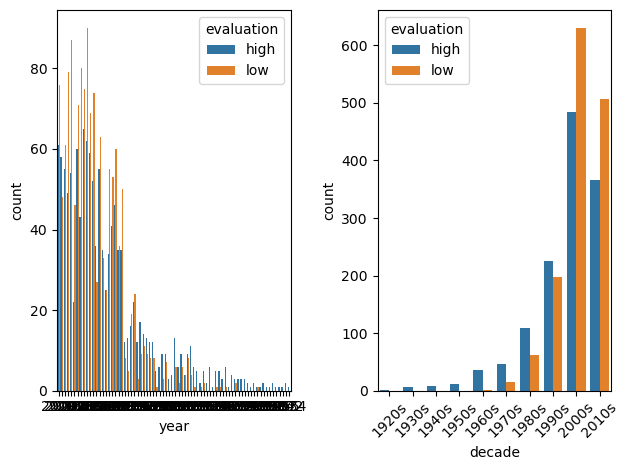

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# release_dateからyearカラムを作る
df['year'] = df['release_date'].apply(lambda x: x[:4])
sns.countplot(x='year', data=df, hue='evaluation', ax=axes[0])
ax.tick_params(rotation=90)

#　西暦別では分かりにくいので年代カラムを作る
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation', ax=axes[1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='decade', ylabel='vote_average'>

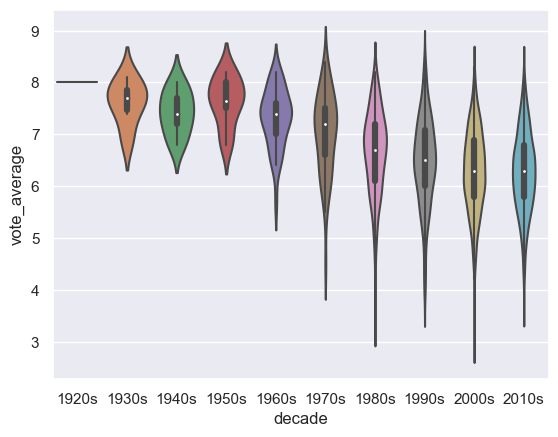

In [32]:
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

In [50]:
#ヒートマップ作成
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[(df!=0).all(axis=1)]
df_num = df.select_dtypes(include=np.number)
corr = df_num.corr()
corr

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


<Axes: >

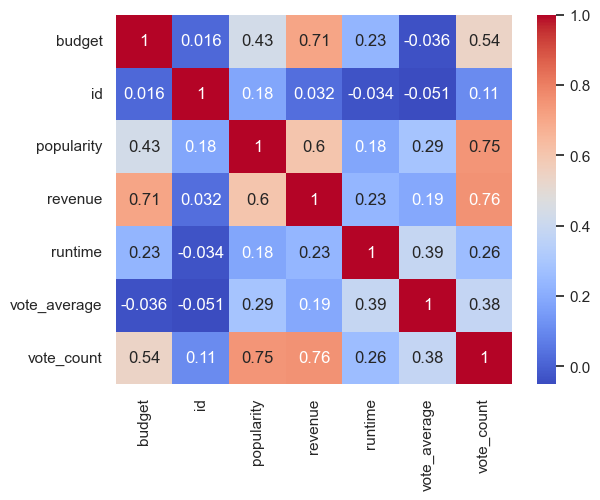

In [53]:
sns.heatmap(corr, cmap='coolwarm', annot=True)